In [82]:
import numpy as np
import pandas as pd

# import the KNNimputer class
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

In [115]:
import seaborn as sns

In [2]:
# cargamos los ficheros xlsx
bicisXcel20 = pd.read_excel('data/AccidentesBicicletas_2020.xlsx')
bicisXcel21 = pd.read_excel('data/AccidentesBicicletas_2021.xlsx')
bicisXcel22 = pd.read_excel('data/AccidentesBicicletas_2022.xlsx')
bicisXcel23 = pd.read_excel('data/AccidentesBicicletas_2023.xlsx')

# Leemos los valores del fichero y los cargamos en un dataframe
bicis20 = pd.DataFrame(bicisXcel20)
bicis21 = pd.DataFrame(bicisXcel21)
bicis22 = pd.DataFrame(bicisXcel22)
bicis23 = pd.DataFrame(bicisXcel23)

dfBicis = pd.concat([bicis20, bicis21, bicis22, bicis23])
dfBicis

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehículo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,tipo_vehiculo
0,2020S000044,2020-01-02,07:30:00,CALL. ALBASANZ / CALL. RUFINO GONZALEZ,23,20.0,SAN BLAS-CANILLEJAS,Colisión frontal,Despejado,Bicicleta,Conductor,De 40 a 44 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,4.468640e+08,4.476526e+09,N,NaN,NaN
1,2020S000151,2020-01-04,13:45:00,"CALL. ORENSE, 12",12,6.0,TETUÁN,Caída,Despejado,Bicicleta,Conductor,De 21 a 24 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,4.410475e+08,4.477835e+09,N,NaN,NaN
2,2020S000153,2020-01-04,12:10:00,"CALL. NUESTRA SEÑORA DE VALVERDE, 209",209,8.0,FUENCARRAL-EL PARDO,Colisión múltiple,Despejado,Bicicleta,Conductor,De 10 a 14 años,Hombre,1.0,Atención en urgencias sin posterior ingreso,4.419754e+08,4.484542e+09,N,NaN,NaN
3,2020S000153,2020-01-04,12:10:00,"CALL. NUESTRA SEÑORA DE VALVERDE, 209",209,8.0,FUENCARRAL-EL PARDO,Colisión múltiple,Despejado,Bicicleta,Conductor,De 45 a 49 años,Hombre,2.0,Ingreso inferior o igual a 24 horas,4.419754e+08,4.484542e+09,N,NaN,NaN
4,2020S000212,2020-01-04,13:30:00,"M-605, KM 1,600 SOMONTES (CAMINO)",20,8.0,FUENCARRAL-EL PARDO,Caída,Despejado,Bicicleta,Conductor,De 35 a 39 años,Hombre,6.0,Asistencia sanitaria inmediata en centro de sa...,4.391659e+08,4.484558e+09,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12183,2023S013443,2023-03-31,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,NaN,Conductor,De 25 a 29 años,Hombre,NaN,Sin asistencia sanitaria,4.425613e+05,4.471591e+06,N,NaN,Motocicleta hasta 125cc
12184,2023S013443,2023-03-31,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,NaN,Conductor,De 40 a 44 años,Hombre,NaN,Asistencia sanitaria sólo en el lugar del acci...,4.425613e+05,4.471591e+06,N,NaN,Turismo
12185,2023S013443,2023-03-31,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,NaN,Pasajero,De 40 a 44 años,Mujer,NaN,Sin asistencia sanitaria,4.425613e+05,4.471591e+06,N,NaN,Turismo
12186,2023S014588,2023-03-17,11:50:00,PASEO. CASTELLANA / CUZCO,162,5.0,CHAMARTÍN,Alcance,Despejado,NaN,Conductor,Desconocido,Desconocido,NaN,Asistencia sanitaria sólo en el lugar del acci...,4.414998e+05,4.478870e+06,N,NaN,NaN


In [11]:
# chequeamos los valores nulos de nuestro dataSet
dfBicis.isnull().sum()

num_expediente              0
fecha                       0
hora                        0
localizacion                0
numero                      1
cod_distrito                1
distrito                    1
tipo_accidente              0
estado_meteorológico        0
tipo_vehículo           13066
tipo_persona                0
rango_edad                  0
sexo                        0
cod_lesividad            6278
lesividad                   0
coordenada_x_utm            2
coordenada_y_utm            2
positiva_alcohol           56
positiva_droga          14790
tipo_vehiculo            1871
dtype: int64

In [3]:
# Realizamos un backup del dataFrame de bicis
dfBicisBackup = dfBicis

In [4]:
dfBicis = dfBicis.drop(['num_expediente', 'localizacion', 'numero', 'tipo_vehículo', 'tipo_vehiculo', 'cod_distrito', 'cod_lesividad'], axis=1)

In [5]:
dfBicis = dfBicis.dropna(subset = ['distrito', 'coordenada_y_utm', 'coordenada_x_utm', 'positiva_alcohol'])

In [6]:
dfBicis['positiva_droga'] = dfBicis['positiva_droga'].fillna(0)

In [7]:
# Para la variable estado_meteorológico tenemos los siguientes valores: Despejado, Nublado, Lluvia débil, Se desconoce, Lluvia intensa.
dfBicis.estado_meteorológico.value_counts()

Despejado         13177
Nublado             871
Lluvia débil        590
LLuvia intensa       74
Se desconoce         69
Name: estado_meteorológico, dtype: int64

In [17]:
dfBicis.lesividad.value_counts()

Sin asistencia sanitaria                                     6473
Asistencia sanitaria sólo en el lugar del accidente          3799
Ingreso inferior o igual a 24 horas                          1505
Atención en urgencias sin posterior ingreso                  1111
Asistencia sanitaria inmediata en centro de salud o mutua     911
Asistencia sanitaria ambulatoria con posterioridad            535
Ingreso superior a 24 horas                                   433
Fallecido 24 horas                                             13
Se desconoce                                                    1
Name: lesividad, dtype: int64

Para la evaluacion de los datos voy a tratar las siguientes variables y pasarlas a tipo category:
* estado_meteorológico
* lesividad
* distrito
* tipo_accdidente
* tipo_persona
* rango_edad
* sexo
* positiva_alcohol
* positiva_droga

In [8]:
# Tenemos que pasar las variables a tipo categorical para poder tratarlas
dfBicis['estado_meteorológico'] = dfBicis['estado_meteorológico'].astype('category')

In [9]:
# Tenemos que pasar las variables a tipo categorical para poder tratarlas
dfBicis['lesividad'] = dfBicis['lesividad'].astype('category')

In [10]:
# distrito
dfBicis['distrito'] = dfBicis['distrito'].astype('category')

In [12]:
# tipo_accdidente
dfBicis['tipo_accidente'] = dfBicis['tipo_accidente'].astype('category')

In [13]:
# tipo_persona
dfBicis['tipo_persona'] = dfBicis['tipo_persona'].astype('category')

In [14]:
# rango_edad
dfBicis['rango_edad'] = pd.Categorical(dfBicis['rango_edad'], ordered=True)

In [15]:
# sexo
dfBicis['sexo'] = pd.Categorical(dfBicis['sexo'], ordered=True)

In [16]:
# positiva_alcohol
dfBicis['positiva_alcohol'] = pd.Categorical(dfBicis['positiva_alcohol'], ordered=True)

In [17]:
# positiva_droga
dfBicis['positiva_droga'] = pd.Categorical(dfBicis['positiva_droga'], ordered=True)

In [18]:
dfBicis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14781 entries, 0 to 12187
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   fecha                 14781 non-null  datetime64[ns]
 1   hora                  14781 non-null  object        
 2   distrito              14781 non-null  category      
 3   tipo_accidente        14781 non-null  category      
 4   estado_meteorológico  14781 non-null  category      
 5   tipo_persona          14781 non-null  category      
 6   rango_edad            14781 non-null  category      
 7   sexo                  14781 non-null  category      
 8   lesividad             14781 non-null  category      
 9   coordenada_x_utm      14781 non-null  float64       
 10  coordenada_y_utm      14781 non-null  float64       
 11  positiva_alcohol      14781 non-null  category      
 12  positiva_droga        14781 non-null  category      
dtypes: category(9), 

Renombramos las variables de las columnas

In [19]:
dfBicis.rename(columns={'tipo_accidente':'accidente',
                        'estado_meteorológico':'meteorología',
                        'rango_edad':'edad',
                        'positiva_alcohol':'alcohol',
                        'positiva_droga':'droga'},
               inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14781 entries, 0 to 12187
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha             14781 non-null  datetime64[ns]
 1   hora              14781 non-null  object        
 2   distrito          14781 non-null  object        
 3   accidente         14781 non-null  object        
 4   meteorología      14781 non-null  category      
 5   tipo_persona      14781 non-null  object        
 6   edad              14781 non-null  object        
 7   sexo              14781 non-null  object        
 8   lesividad         14781 non-null  category      
 9   coordenada_x_utm  14781 non-null  float64       
 10  coordenada_y_utm  14781 non-null  float64       
 11  alcohol           14781 non-null  object        
 12  droga             14781 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(3), object(7)
memory usage: 1.4+ 

### Representamos gráficamente los datos

In [67]:
dfBicis['year'] = [t.year for t in pd.DatetimeIndex(dfBicis.fecha)]
dfBicis['year'] = dfBicis['year'].map({2020:2020, 2021:2021, 2022:2022, 2023:2023})

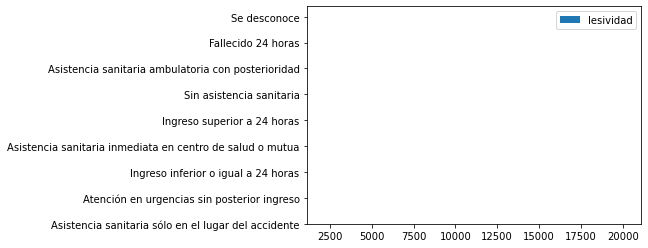

In [68]:
dfForYear = pd.DataFrame({'year': dfBicis['year'],
                   'lesividad': dfBicis['lesividad']})

In [69]:
dfForYear['year'] = pd.Categorical(dfForYear['year'], ordered=True)

In [70]:
dfForYear['lesividad'] = pd.Categorical(dfForYear['lesividad'],categories=['Sin asistencia sanitaria','Asistencia sanitaria sólo en el lugar del accidente','Ingreso inferior o igual a 24 horas','Atención en urgencias sin posterior ingreso','Asistencia sanitaria inmediata en centro de salud o mutua','Asistencia sanitaria ambulatoria con posterioridad','Ingreso superior a 24 horas','Fallecido 24 horas','Se desconoce'], ordered=True)

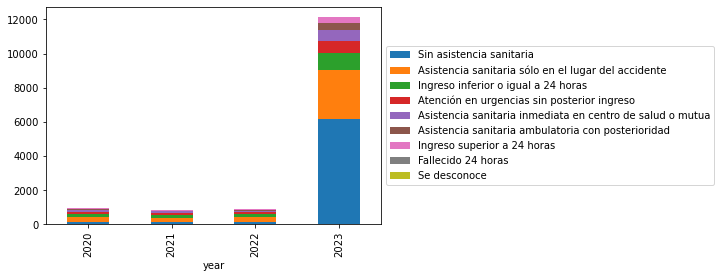

In [207]:
plot = pd.crosstab(index=dfForYear['year'],
            columns=dfForYear['lesividad']
                  ).plot(kind='bar', stacked=True)
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))


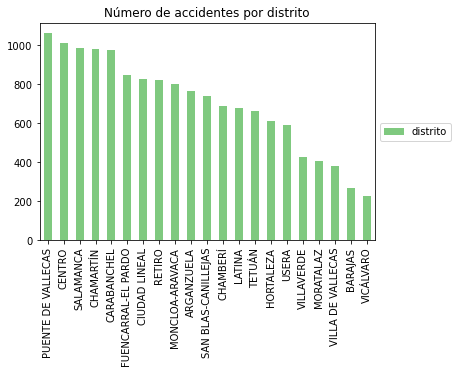

In [76]:
# Accidentes por distrito
plot = dfBicis['distrito'].value_counts().plot(kind='bar',
                                            title='Número de accidentes por distrito', colormap='Accent')


In [77]:
# Transformamos la hora a formato datetime y creamos columna de hora
dfBicis['hour'] = pd.to_datetime(dfBicis['hora'], format='%H:%M:%S').dt.hour

In [106]:
# Sacamos el dia de la semana a partir de la fecha
dayOfWeek={0:'Lunes', 1:'Martes', 2:'Miercoles', 3:'Jueves', 4:'Viernes', 5:'Sabado', 6:'Domingo'}
dfBicis['diaSemana'] = dfBicis['fecha'].dt.dayofweek.map(dayOfWeek)

In [112]:
dfBicis['diaSemana'] = pd.Categorical(dfBicis['diaSemana'],categories=['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'], ordered=True)

AttributeError: 'Series' object has no attribute 'strftime'

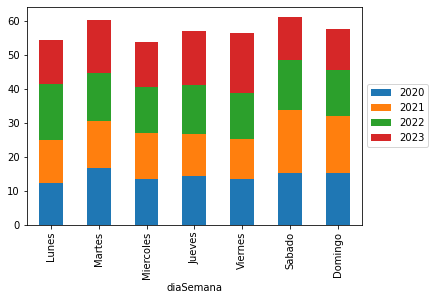

In [113]:
# día de la semana y año
plot = pd.crosstab(index=dfBicis['diaSemana'],
            columns=dfBicis['year']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot:xlabel='dia', ylabel='hora'>

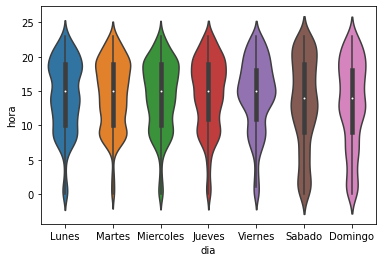

In [126]:
# Distribucion de accidentes por hora y día
dfDiaHora = pd.DataFrame({'hora': dfBicis['hour'],
                   'dia': dfBicis['diaSemana']})
dfDiaHora = dfDiaHora.explode('hora')
dfDiaHora['hora'] = dfDiaHora['hora'].astype('float')
sns.violinplot(data=dfDiaHora, x='dia', y='hora')

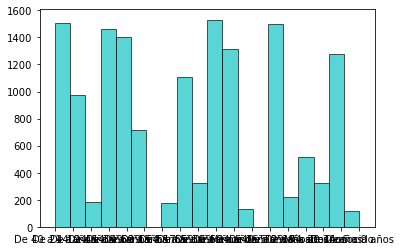

In [128]:

#plt.axvline(dfBicis['edad'].mean(), color='k', linestyle='dashed', linewidth=0.5)
#plt.axvline(dfBicis['edad'].median(), color='k', linestyle='dashed', linewidth=1.5)
#min_ylim, max_ylim = plt.ylim()
#plt.text(dfBicis['edad'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(dfBicis['edad'].mean()))

In [129]:
dfEdadSexo = pd.DataFrame({'edad': dfBicis['edad'],
                   'sexo': dfBicis['sexo']})

In [137]:
dfEdadSexo.edad.value_counts()

De 30 a 34 años    1531
De 40 a 44 años    1507
De 25 a 29 años    1503
De 45 a 49 años    1459
De 35 a 39 años    1402
De 50 a 54 años    1314
Desconocido        1277
De 55 a 59 años    1104
De 21 a 24 años     976
De 60 a 64 años     719
De 18 a 20 años     517
Más de 74 años      325
De 65 a 69 años     324
De 70 a 74 años     218
De 10 a 14 años     183
De 15 a 17 años     177
Menor de 5 años     128
De 6 a 9 años       117
Name: edad, dtype: int64

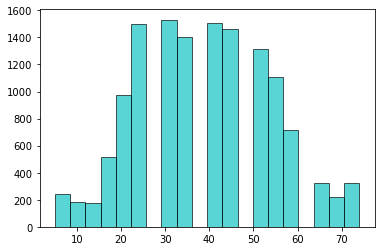

In [149]:
result = plt.hist(dfEdadSexo['num_edad'], bins=20, color='c', edgecolor='k', alpha=0.65)

In [139]:
dfEdadSexo['num_edad'] = dfEdadSexo['edad'].map({'Menor de 5 años':5, 'De 6 a 9 años':6, 'De 10 a 14 años':10, 'De 15 a 17 años':15,'De 18 a 20 años':18,'De 21 a 24 años':21, 'De 25 a 29 años':25, 'De 30 a 34 años':30, 'De 35 a 39 años':35, 'De 40 a 44 años':40, 'De 45 a 49 años':45, 'De 50 a 54 años':50, 'De 55 a 59 años':55, 'De 60 a 64 años':60, 'De 65 a 69 años':65, 'De 70 a 74 años':70, 'Más de 74 años':74})

In [142]:
dfEdadSexo = dfEdadSexo.drop(dfEdadSexo[dfEdadSexo['num_edad']=='Desconocido'].index)

In [164]:
dfEdadSexo = dfEdadSexo.drop(dfEdadSexo[dfEdadSexo['sexo']=='Desconocido'].index)

In [272]:
dfEdadSexo1.sexo.value_counts()

Hombre         9397
Mujer          4154
Desconocido       0
Name: sexo, dtype: int64

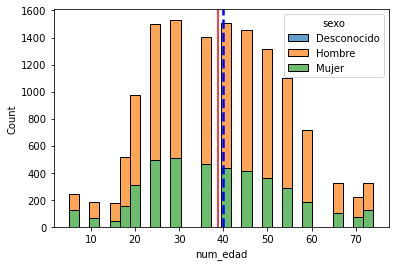

In [182]:
ax = sns.histplot(data=dfEdadSexo, x="num_edad",hue='sexo', alpha = .7, multiple="stack", bins=30)
plt.axvline(x=dfEdadSexo.num_edad.mean(), color='red')
plt.axvline(x=dfEdadSexo.num_edad.median(),color='blue',ls='--',lw=2.5)

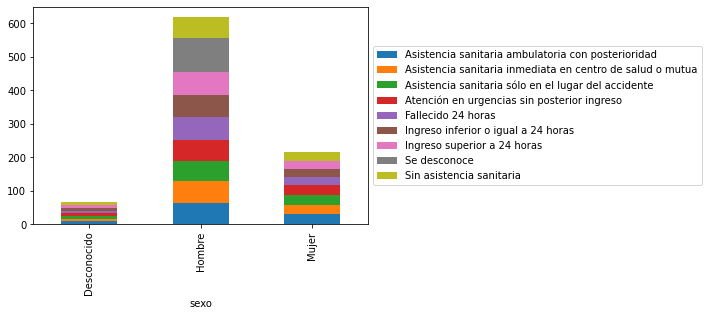

In [231]:
plot = pd.crosstab(index=dfBicis['sexo'],
            columns=dfBicis['lesividad']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [185]:
dfSexoLesividad = pd.DataFrame({'lesividad': dfBicis['lesividad'],
                   'sexo': dfBicis['sexo']})

In [195]:
dfSexoLesividad['lesividad'] = pd.Categorical(dfSexoLesividad['lesividad'],categories=['Sin asistencia sanitaria','Asistencia sanitaria sólo en el lugar del accidente','Ingreso inferior o igual a 24 horas','Atención en urgencias sin posterior ingreso','Asistencia sanitaria inmediata en centro de salud o mutua','Asistencia sanitaria ambulatoria con posterioridad','Ingreso superior a 24 horas','Fallecido 24 horas','Se desconoce'], ordered=True)

In [236]:
dfBicis.accidente.value_counts()

Colisión fronto-lateral         3736
Alcance                         3241
Colisión lateral                2124
Caída                           1468
Choque contra obstáculo fijo    1371
Atropello a persona             1105
Colisión múltiple                903
Colisión frontal                 401
Otro                             279
Solo salida de la vía             58
Vuelco                            53
Atropello a animal                42
Name: accidente, dtype: int64

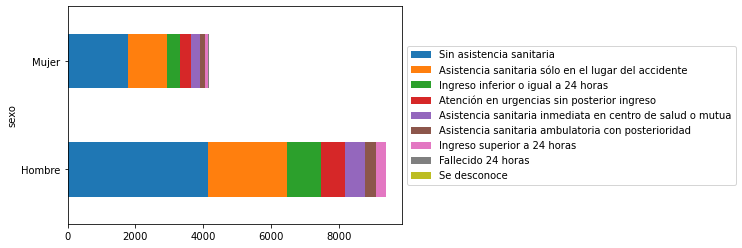

In [205]:
plot = pd.crosstab(index=dfSexoLesividad['sexo'],
            columns=dfSexoLesividad['lesividad']
                  ).plot(kind='barh', stacked=True)
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [237]:
dfLesividadAccidente = pd.DataFrame({'lesividad': dfBicis['lesividad'],
                   'accidente': dfBicis['accidente']})

In [245]:
dfLesividadAccidente['lesividad'] = pd.Categorical(dfLesividadAccidente['lesividad'],categories=['Sin asistencia sanitaria','Asistencia sanitaria sólo en el lugar del accidente','Ingreso inferior o igual a 24 horas','Atención en urgencias sin posterior ingreso','Asistencia sanitaria inmediata en centro de salud o mutua','Asistencia sanitaria ambulatoria con posterioridad','Ingreso superior a 24 horas','Fallecido 24 horas','Se desconoce'], ordered=True)

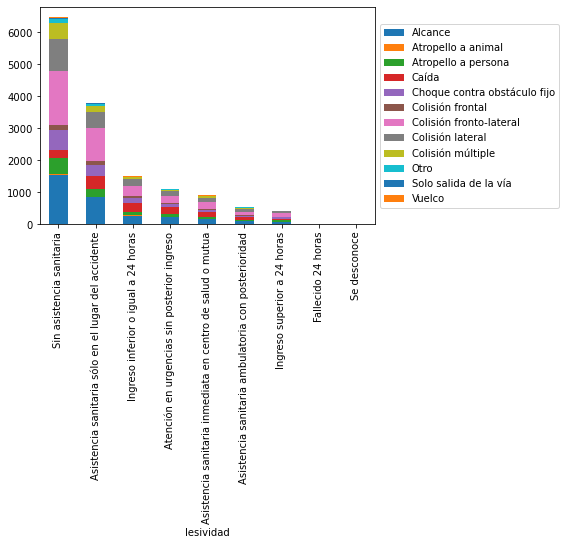

In [252]:
plot = pd.crosstab(index=dfLesividadAccidente['lesividad'],
            columns=dfLesividadAccidente['accidente']
                  ).plot(kind='bar', stacked=True)
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

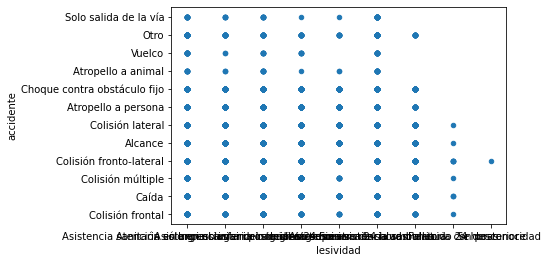

In [248]:
dfLesividadAccidente.plot.scatter(x="lesividad", y="accidente");

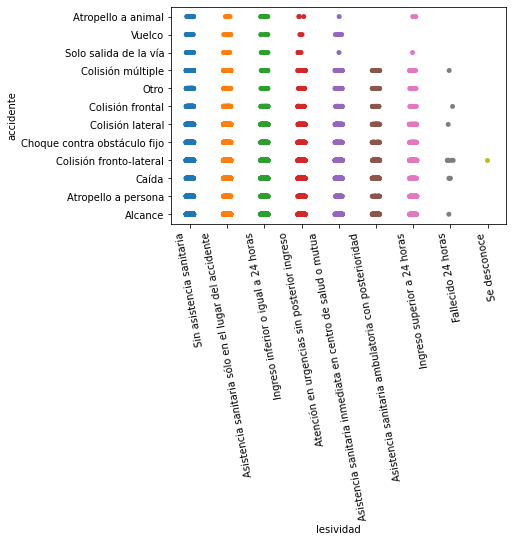

In [256]:
ax = sns.stripplot(data=dfLesividadAccidente, x="lesividad", y='accidente')
ax.tick_params(axis='x', labelrotation = 100)

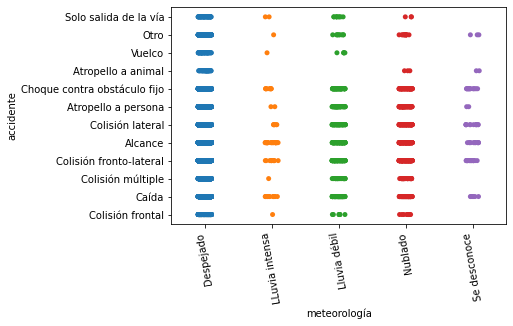

In [257]:
ax = sns.stripplot(data=dfBicis, x="meteorología", y='accidente')
ax.tick_params(axis='x', labelrotation = 100)

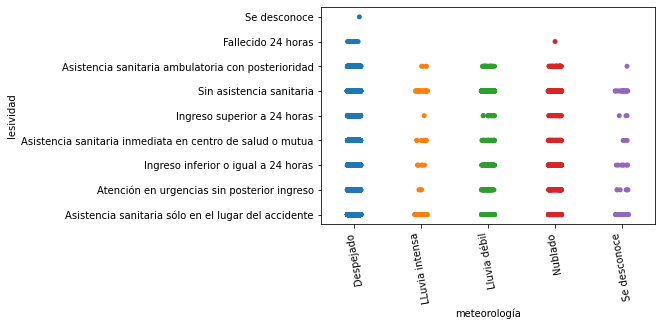

In [258]:
ax = sns.stripplot(data=dfBicis, x="meteorología", y='lesividad')
ax.tick_params(axis='x', labelrotation = 100)

In [274]:
dfBicis

,index,fecha,hora,distrito,accidente,meteorología,tipo_persona,edad,sexo,lesividad,coordenada_x_utm,coordenada_y_utm,alcohol,droga,year,hour,Dia,diaSemana
0,0,2020-01-02,07:30:00,SAN BLAS-CANILLEJAS,Colisión frontal,Despejado,Conductor,De 40 a 44 años,Hombre,Asistencia sanitaria sólo en el lugar del acci...,4.468640e+08,4.476526e+09,N,0.0,2020,7,1,Jueves
1,1,2020-01-04,13:45:00,TETUÁN,Caída,Despejado,Conductor,De 21 a 24 años,Hombre,Asistencia sanitaria sólo en el lugar del acci...,4.410475e+08,4.477835e+09,N,0.0,2020,13,1,Sabado
2,2,2020-01-04,12:10:00,FUENCARRAL-EL PARDO,Colisión múltiple,Despejado,Conductor,De 10 a 14 años,Hombre,Atención en urgencias sin posterior ingreso,4.419754e+08,4.484542e+09,N,0.0,2020,12,1,Sabado
3,3,2020-01-04,12:10:00,FUENCARRAL-EL PARDO,Colisión múltiple,Despejado,Conductor,De 45 a 49 años,Hombre,Ingreso inferior o igual a 24 horas,4.419754e+08,4.484542e+09,N,0.0,2020,12,1,Sabado
4,4,2020-01-04,13:30:00,FUENCARRAL-EL PARDO,Caída,Despejado,Conductor,De 35 a 39 años,Hombre,Asistencia sanitaria inmediata en centro de sa...,4.391659e+08,4.484558e+09,N,0.0,2020,13,1,Sabado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14776,12183,2023-03-31,13:30:00,PUENTE DE VALLECAS,Alcance,Despejado,Conductor,De 25 a 29 años,Hombre,Sin asistencia sanitaria,4.425613e+05,4.471591e+06,N,0.0,2023,13,13,Viernes
14777,12184,2023-03-31,13:30:00,PUENTE DE VALLECAS,Alcance,Despejado,Conductor,De 40 a 44 años,Hombre,Asistencia sanitaria sólo en el lugar del acci...,4.425613e+05,4.471591e+06,N,0.0,2023,13,13,Viernes
14778,12185,2023-03-31,13:30:00,PUENTE DE VALLECAS,Alcance,Despejado,Pasajero,De 40 a 44 años,Mujer,Sin asistencia sanitaria,4.425613e+05,4.471591e+06,N,0.0,2023,13,13,Viernes
14779,12186,2023-03-17,11:50:00,CHAMARTÍN,Alcance,Despejado,Conductor,Desconocido,Desconocido,Asistencia sanitaria sólo en el lugar del acci...,4.414998e+05,4.478870e+06,N,0.0,2023,11,11,Viernes


In [276]:
dfEdadSexo

,sexo,num_edad
0,Hombre,40.0
1,Hombre,21.0
2,Hombre,10.0
3,Hombre,45.0
4,Hombre,35.0
...,...,...
14775,Mujer,40.0
14776,Hombre,25.0
14777,Hombre,40.0
14778,Mujer,40.0


In [306]:
#dfBicisBackup.reset_index(drop=True, inplace=True)
dfdistrito = dfBicisBackup['cod_distrito']
# dfBicisML['edad'] = edad.astype(integer)
#dfBicisML.reset_index(drop=True, inplace=True)
dfdistrito
#dfBicisML['distrito'] = distrito

0        20.0
1         6.0
2         8.0
3         8.0
4         8.0
         ... 
14835    13.0
14836    13.0
14837    13.0
14838     5.0
14839     5.0
Name: cod_distrito, Length: 14840, dtype: float64

In [307]:
dfBicisML

,año,hora,edad,dia
0,2020,7,40.0,3
1,2020,13,21.0,5
2,2020,12,10.0,5
3,2020,12,45.0,5
4,2020,13,35.0,5
...,...,...,...,...
14776,2023,13,25.0,4
14777,2023,13,40.0,4
14778,2023,13,40.0,4
14779,2023,11,NaN,4


In [303]:
dfBicisBackup.head()

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehículo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,tipo_vehiculo
0,2020S000044,2020-01-02,07:30:00,CALL. ALBASANZ / CALL. RUFINO GONZALEZ,23,20.0,SAN BLAS-CANILLEJAS,Colisión frontal,Despejado,Bicicleta,Conductor,De 40 a 44 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,446864000.0,4.476526e+09,N,NaN,NaN
1,2020S000151,2020-01-04,13:45:00,"CALL. ORENSE, 12",12,6.0,TETUÁN,Caída,Despejado,Bicicleta,Conductor,De 21 a 24 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,441047495.0,4.477835e+09,N,NaN,NaN
2,2020S000153,2020-01-04,12:10:00,"CALL. NUESTRA SEÑORA DE VALVERDE, 209",209,8.0,FUENCARRAL-EL PARDO,Colisión múltiple,Despejado,Bicicleta,Conductor,De 10 a 14 años,Hombre,1.0,Atención en urgencias sin posterior ingreso,441975418.0,4.484542e+09,N,NaN,NaN
3,2020S000153,2020-01-04,12:10:00,"CALL. NUESTRA SEÑORA DE VALVERDE, 209",209,8.0,FUENCARRAL-EL PARDO,Colisión múltiple,Despejado,Bicicleta,Conductor,De 45 a 49 años,Hombre,2.0,Ingreso inferior o igual a 24 horas,441975418.0,4.484542e+09,N,NaN,NaN
4,2020S000212,2020-01-04,13:30:00,"M-605, KM 1,600 SOMONTES (CAMINO)",20,8.0,FUENCARRAL-EL PARDO,Caída,Despejado,Bicicleta,Conductor,De 35 a 39 años,Hombre,6.0,Asistencia sanitaria inmediata en centro de sa...,439165869.0,4.484558e+09,N,NaN,NaN


In [304]:
dfBicisBackup[dfBicisBackup.index.duplicated()]

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehículo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,tipo_vehiculo
